In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pickles_folder = "../../pickles/all/"

In [3]:
df_full = pd.read_pickle(pickles_folder + "full_labels.pkl")
df_b_blcd = pd.read_pickle(pickles_folder + "binary_balanced_labels.pkl")
df_m_blcd = pd.read_pickle(pickles_folder + "multiclass_balanced_labels.pkl")

series_full_bin = df_full[' Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else 'BENIGN')
series_b_blcd_bin = df_b_blcd[' Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else 'BENIGN')
series_m_blcd_bin = df_m_blcd[' Label'].apply(lambda x: 'ATTACK' if x != 'BENIGN' else 'BENIGN')

In [4]:
def shannon_index(data):
    info = [p*np.log(p) for p in data.value_counts(normalize=True)]
    return -sum(info)

def pielou_index(data):
    S = data.nunique()
    return shannon_index(data)/np.log(S)

___

# Full Dataset

In [5]:
df_full[' Label'].value_counts()

TFTP             20082580
DrDoS_SNMP        5159870
DrDoS_DNS         5071011
DrDoS_MSSQL       4522492
DrDoS_NetBIOS     4093279
DrDoS_UDP         3134645
DrDoS_SSDP        2610611
DrDoS_LDAP        2179930
Syn               1582289
DrDoS_NTP         1202642
UDP-lag            366461
BENIGN              56863
WebDDoS               439
Name:  Label, dtype: int64

In [6]:
len(df_full[' Label'])

50063112

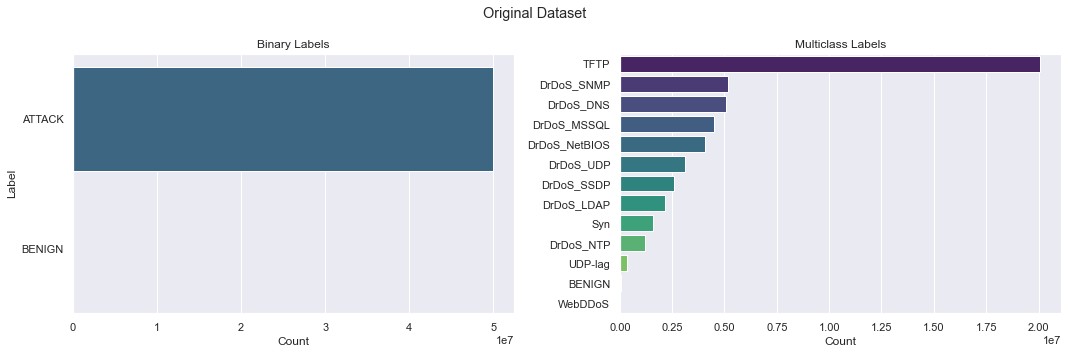

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Original Dataset')

sns.barplot(ax = axes[0],
            y = series_full_bin.value_counts().index,
            x = series_full_bin.value_counts().values,
            palette='viridis')
axes[0].set_title("Binary Labels")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Label")

sns.barplot(ax = axes[1],
            y = df_full[' Label'].value_counts().index,
            x = df_full[' Label'].value_counts().values,
            palette='viridis')
axes[1].set_title("Multiclass Labels")
axes[1].set_xlabel("Count")

fig.tight_layout()
plt.savefig("../../pictures/all/original_class_distribution.pdf")

In [7]:
data = {"Pielou Index": [pielou_index(df_full[' Label']), pielou_index(series_full_bin)]}
df = pd.DataFrame.from_dict(data, orient='index', columns=["Multiclass","Binary"])
df

,Multiclass,Binary
Pielou Index,0.764539,0.012748


___

# Binary Balanced Dataset

In [8]:
df_b_blcd[' Label'].value_counts()

BENIGN           2640
DrDoS_UDP         240
Syn               240
DrDoS_NetBIOS     240
DrDoS_DNS         240
DrDoS_LDAP        240
DrDoS_SNMP        240
DrDoS_MSSQL       240
DrDoS_NTP         240
TFTP              240
UDP-lag           240
DrDoS_SSDP        240
Name:  Label, dtype: int64

In [9]:
len(df_b_blcd[' Label'])

5280

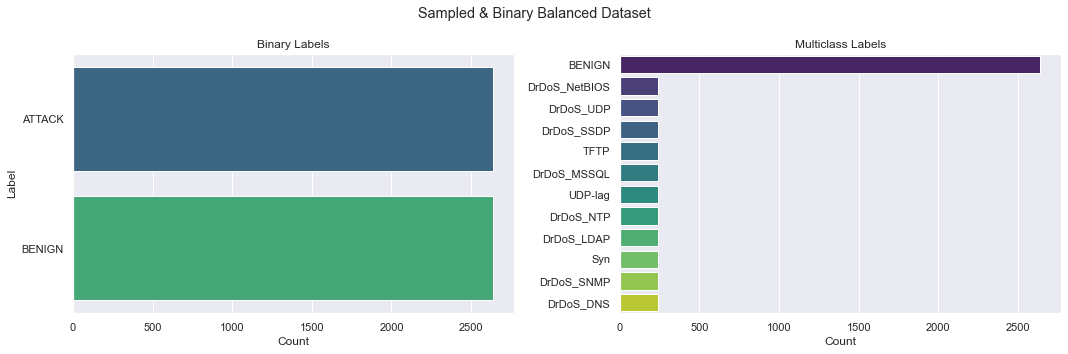

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Sampled & Binary Balanced Dataset')

sns.barplot(ax = axes[0],
            y = series_b_blcd_bin.value_counts().index,
            x = series_b_blcd_bin.value_counts().values,
            palette='viridis')
axes[0].set_title("Binary Labels")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Label")

sns.barplot(ax = axes[1],
            y = df_b_blcd[' Label'].value_counts().index,
            x = df_b_blcd[' Label'].value_counts().values,
            palette='viridis')
axes[1].set_title("Multiclass Labels")
axes[1].set_xlabel("Count")

fig.tight_layout()
plt.savefig("../../pictures/all/binary_balanced_class_distribution.pdf")

In [11]:
data = {"Pielou Index": [pielou_index(df_b_blcd[' Label']), pielou_index(series_b_blcd_bin)]}
df = pd.DataFrame.from_dict(data, orient='index', columns=["Multiclass","Binary"])
df

,Multiclass,Binary
Pielou Index,0.761435,1.0


___

# Multiclass Balanced Dataset

In [12]:
df_m_blcd[' Label'].value_counts()

DrDoS_UDP        440
Syn              440
DrDoS_NetBIOS    440
DrDoS_DNS        440
DrDoS_LDAP       440
BENIGN           440
DrDoS_SNMP       440
DrDoS_MSSQL      440
DrDoS_NTP        440
TFTP             440
UDP-lag          440
DrDoS_SSDP       440
Name:  Label, dtype: int64

In [13]:
len(df_m_blcd[' Label'])

5280

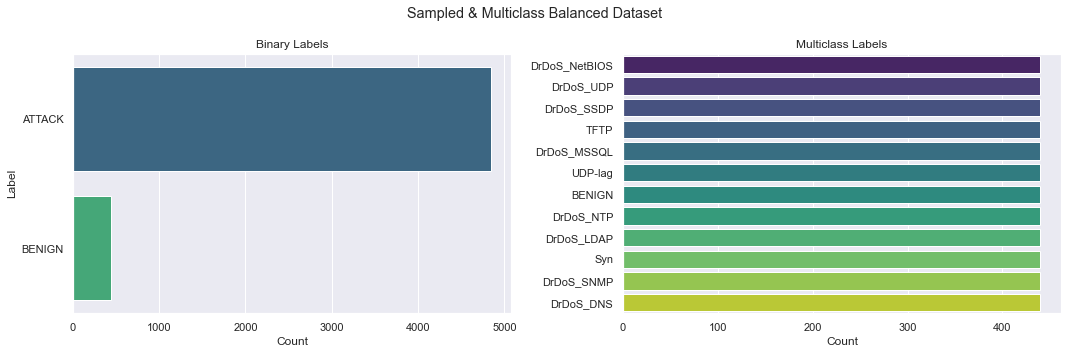

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Sampled & Multiclass Balanced Dataset')

sns.barplot(ax = axes[0],
            y = series_m_blcd_bin.value_counts().index,
            x = series_m_blcd_bin.value_counts().values,
            palette='viridis')
axes[0].set_title("Binary Labels")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Label")

sns.barplot(ax = axes[1],
            y = df_m_blcd[' Label'].value_counts().index,
            x = df_m_blcd[' Label'].value_counts().values,
            palette='viridis')
axes[1].set_title("Multiclass Labels")
axes[1].set_xlabel("Count")

fig.tight_layout()
plt.savefig("../../pictures/all/multiclass_balanced_class_distribution.pdf")

In [11]:
data = {"Pielou Index": [pielou_index(df_m_blcd[' Label']), pielou_index(series_m_blcd_bin)]}
df_original = pd.DataFrame.from_dict(data, orient='index', columns=["Multiclass","Binary"])
df_original

,Multiclass,Binary
Pielou Index,1.0,0.413817
